In [5]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris=load_iris(as_frame=True)
X=iris.data[['petal length (cm)','petal width (cm)']].values
y=(iris.target ==2) #Iris Virginica

svm_clf=make_pipeline(StandardScaler(),
                      LinearSVC(C=1,random_state=42))
svm_clf.fit(X,y)

c:\Users\Abhishek\pythonpractice\Machine Learning\100 days of machine learning\SVM\ml_demo_env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [6]:
X_new=[[5.5,1.7],[5.0,1.5]]

svm_clf.predict(X_new)

array([ True, False])

- First plant is classified as virginica, while second as not

#### Let's look at the scores that the SVM used to make the predictions. 
- These measures the signed distance between each point and the decision boundary

In [7]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

- Unlike LogisticRegression, LinearSVC doesn’t have a predict_proba() method to estimate the class probabilities. 
That said, if you use the SVC class (discussed shortly) instead of LinearSVC, and if you set its probability hyperparameter
 to True, then the model will fit an extra model at the end of training to map the SVM decision function scores to estimated
 probabilities. Under the hood, this requires using 5-fold cross-validation to generate out-of-sample predictions for every
 instance in the training set, then training a LogisticRegression model, so it will slow down training considerably. 
 After that, the predict_proba() and predict_log_proba() methods will be available

### Non-linear SVM Classification

In [8]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X,y=make_moons(n_samples=100,noise=0.15,random_state=42)

polynomial_svm_clf=make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10,max_iter=10_000,random_state=42)
)

polynomial_svm_clf.fit(X,y)

c:\Users\Abhishek\pythonpractice\Machine Learning\100 days of machine learning\SVM\ml_demo_env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

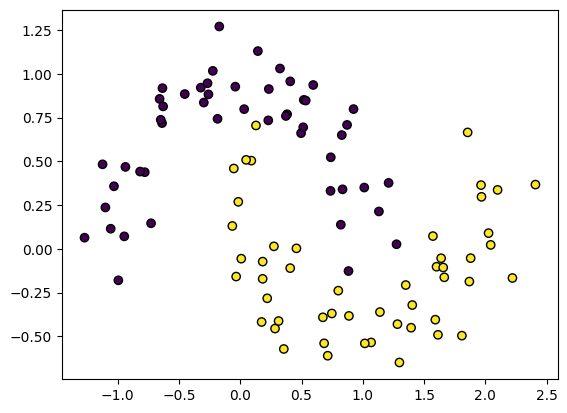

In [18]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.viridis, edgecolor='k')
plt.show()